In [1]:
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
import pandas as pd
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from IPython.display import display, Math, Latex
from sympy.abc import x
from sympy import Poly
from sympy.solvers.inequalities import solve_rational_inequalities
%matplotlib inline

# Assignment 1

For a particular type of battery, the supplier specifies that the lifetime T for the batteries is normally distributed with a mean lifetime of 3000 hours with a standard deviation of 100 hours: T 𝑇~𝒩(3000 hours; (100hours)**2 ).

In [3]:
#Normal distribution
#mu= 3.000 hours
#standart deviation = 100 hours
#There are randomly picked up 12 batteries of the type. In a test, the lifetime of these are measured as: 

a)Estimate the mean lifetime for the batteries 


In [4]:
X = np.array([3148,2956,2803,2933,2869,3111,2789,2995,2909,2929,3148,2867])
X.mean()


b) Calculate the z-score 


In [5]:
z = (X.mean()-3000)/(100/sqrt(12))
z

c) Calculate the P-value. Is it plausible that the battery lifetime has the distribution the supplier claims? 

In [8]:
prob = norm.cdf(z)   #norm.cdf(z, loc=0, scale=1) 
Pval = 2*min(prob, 1-prob)
Pval

d) Calculate the 95% confidence interval for the mean lifetime of the batteries.

In [20]:
N = 12
low = X.mean() + norm.ppf(0.025)*100/sqrt(N)
low

In [21]:
high = X.mean() + norm.ppf(0.975)* 100/np.sqrt(N)
high

# Assignment 2

31 coin flips is done with a coin, and it has the following distribution where 1=Head and 0=Tail.  

In [27]:
X= np.array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0] )

We assume that the true variance from the population is 0.25, and the true mean is 0.5.  

1. Plot the realization

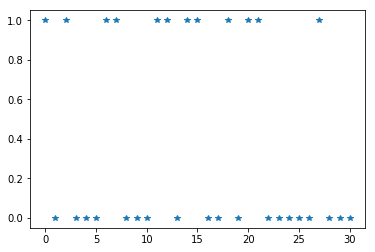

In [35]:
plt.plot(X,'*') 
plt.show()

2. Calculate the sample mean of the realization 

In [36]:
X.mean()

3. Calculate the sample variance of the realization 

In [37]:
print("The sample variance is = " , np.sum((X-X.mean())**2)/(31-1)) 
print("The sample variance is = " ,X.var(ddof=1)) 

The sample variance is =  0.24516129032258072
The sample variance is =  0.24516129032258072


4. Can it be assumed that the sample mean of the realization is normal distributed? 

In [34]:
#Yes, because of the central limit theorem

#The central limit theorem states that the sampling distribution of the sample-means approaches a normal distribution
#as the sample gets larger.
#As a general guideline, if n>30 the central limit will almost always apply.


5) Find the z-score of the realization 

In [38]:
z = (X.mean()-0.5)/(sqrt(0.25)/sqrt(31))
z

6) Calculate the P-value 

In [39]:
prob = norm.cdf(z)   #norm.cdf(z, loc=0, scale=1) 
Pval = 2*min(prob, 1-prob)
Pval

7) Find the 95% confidence interval for the mean (lower and upper endpoint) 

In [40]:
N = 31
low = X.mean() + norm.ppf(0.025)*sqrt(0.25)/sqrt(N)
low

In [41]:
high = X.mean() + norm.ppf(0.975)*sqrt(0.25)/np.sqrt(N)
high

Suddenly we do not trust the Central Limit Theorem. So instead of assuming that the sample mean comes from a normal distribution, the binomial distribution is assumed instead.  

8) Calculate the new Pvalue using the binomial distribution (number of heads=12, and number of trials=31) 

In [46]:
#binom.cdf(x,n,p)
#len(X) = 31
# I am not sure why p= 0.5, it could be the mean or the probability of flipping a coin because there are only 2 possible results
prob = binom.cdf(12,n=len(X),p=0.5)  
Pval = 2*min(prob, 1-prob)
Pval

9)Find the new 95% confidence interval for the mean (lower and upper endpoint) 

In [48]:
#In the answer of the exercises, it says this:
mu_lowb = binom.ppf(0.025, n=31, p=0.5) 
mu_highb = binom.ppf(0.975, n=len(X), p=0.5) 
print('mu_lowb = ',mu_lowb) 
print('mu_highb = ',mu_highb) 

mu_lowb =  10.0
mu_highb =  21.0


In [49]:
#But this would be the way it is done in the previous exercises: -- BUT IDK WHICH ONE IS CORRECT
low = X.mean() + binom.ppf(0.025, n =31, p =0.5)*sqrt(0.25)/sqrt(N)
low

In [50]:
high = X.mean() + binom.ppf(0.975, n =31, p =0.5)*sqrt(0.25)/np.sqrt(N)
high

10) Discuss the difference in P-value. Is it big or small? And why? 

In [51]:
#0.20 - 0.28 = 0.08 difference

#It is like this in the answer: # 10 an binomial trial is very non normal. So even though 
#?????????????

# Assignment 3

The speed of a file transfer from a server on campus to a personal computer at a student's home on a weekday evening is normally distributed with a mean of 60 kilobits per second and a standard deviation of 4 kilobits per second.  

a) What is the probability that the file will transfer at a speed of 70 kilobits per second or more? 

In [53]:
#normal distribution
#mean = 60 kilobits per second
#std dev = 4 kilobits per second

#P(X>=70)
x=69 #because we include 70

In [55]:
#Function parameters: sf(x, loc=0, scale=1)  

#loc is the mean = 60
#scale = sigma = standard deviation = 4
display(Math("P(X > = 70)= " + repr(round(norm.sf(x, loc = 60, scale = 4),6) )))

<IPython.core.display.Math object>

b) What is the probability that the file will transfer at a speed of less than 58 kilobits per second?  

In [58]:
#P(X<58)
x= 57 #because we don't use 1-cdf, we need less than 58 = 57
display(Math("P(X < 58)= " + repr(round(norm.cdf(x, loc = 60, scale = 4),6) )))

<IPython.core.display.Math object>

c)If the file is 1 megabyte, what is the average time it will take to transfer the file? (Assume eight bits per byte.)

In [59]:
#mean 60 kilobits per second
#
#1 kilobit = 1000 bits
#1 megabyte = 8000 kilobits
#1 megabyte = 1.000.000 bytes

#60 kilobits.......1 second
#8000 kilobits....x

#8000/60 
x=800/6
x

In [ ]:
#Another way:
#print((8*1000000)/60000) 